In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {'Loja 1': loja1, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

In [2]:
def fat_total(loja):
  faturamento = 0

  for i in loja['Preço']:
    faturamento += i
  return round(faturamento, 2)


In [3]:
def qtd_categoria(loja):
  categorias_unicas = list(set(loja['Categoria do Produto']))
  agrup_cat = []

  for cat in categorias_unicas:
    categoria = [c for c in loja['Categoria do Produto'] if c == cat]
    agrup_cat.append(categoria)

  dict_cat = {categorias_unicas[i]: len(agrup_cat[i]) for i in range(len(categorias_unicas))}

  return dict_cat

def mais_popular(loja):
  categorias = qtd_categoria(loja)

  for cat in categorias:
    if categorias[cat] == max(categorias.values()):
      return cat


In [4]:
def media_avaliacao(loja):
  soma = 0
  soma += sum([loja['Avaliação da compra'][i] for i in range(len(loja['Avaliação da compra']))])
  return round(soma / len(loja['Avaliação da compra']), 2)



In [5]:
def prod_num_vendas(loja):
  produtos_unicos = list(set(loja['Produto']))
  qtd_vendida = []

  for prod in produtos_unicos:
    produto = [p for p in loja['Produto'] if p == prod]
    qtd_vendida.append(len(produto))

  dict_prod = {produtos_unicos[i]: qtd_vendida[i] for i in range(len(produtos_unicos))}
  return dict_prod

def mais_vendido(loja):
  num_vendas = prod_num_vendas(loja)
  mais_vendido = max(num_vendas, key=num_vendas.get)

  return mais_vendido, num_vendas[mais_vendido]

def menos_vendido(loja):
  num_vendas = prod_num_vendas(loja)
  menos_vendido = min(num_vendas, key=num_vendas.get)

  return menos_vendido, num_vendas[menos_vendido]



In [6]:
def frete_custo_med(loja):
  soma = 0
  soma += sum([loja['Frete'][i] for i in range(len(loja['Frete']))])

  return round(soma/len(loja['Frete']), 2)

print(frete_custo_med(loja1))

34.69


In [12]:
def grafico_avaliação(conj_lojas):
  av_lojas = [media_avaliacao(conj_lojas[key]) for key in conj_lojas.keys()]
  fix, ax = plt.subplots()

  y_min = min(av_lojas) - 0.08
  y_max = max(av_lojas) + 0.08

  ax.bar(x = conj_lojas.keys(), height = av_lojas, label = 'blue')
  ax.set_ylabel('Valor das Avaliações')
  ax.set_title('Média de Avaliações de cada Loja')
  ax.set_ylim(y_min, y_max)
  for i, valor in enumerate(av_lojas):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center')
  plt.show()




In [8]:
def grafico_faturamento(conj_lojas):
  faturamentos = [fat_total(conj_lojas[key]) for key in conj_lojas.keys()]
  fig, ax = plt.subplots()

  ax.pie(faturamentos, labels=conj_lojas.keys(), autopct='%.2f%%')
  ax.set_title("Porcentagem do Faturamento de cada Loja sobre o Faturamento Total")
  plt.show()



In [9]:
def grafico_frete(conj_lojas):
  fig, ax = plt.subplots()

  for nome_loja, loja in conj_lojas.items():
    org_frete = np.sort(loja['Frete'])
    plt.plot(org_frete, label=nome_loja)

  ax.set_title("Fretes Organizados por Custo em cada Loja")
  ax.set_xlabel("Índice de Transação (Organizado pelo Custo do Frete)")
  ax.set_ylabel("Custo do Frete")
  ax.legend(title='Loja')
  ax.grid(True, linestyle='--', alpha=0.6)
  plt.show()




===== Loja 1 =====
Faturamento: 1534509.12
Categoria mais popular: moveis
Média avaliação: 3.98
Produto mais vendido: ('Guarda roupas', 60)
Produto menos vendido: ('Celular ABXY', 33)
Custo médio do frete: 34.69


===== Loja 2 =====
Faturamento: 1488459.06
Categoria mais popular: moveis
Média avaliação: 4.04
Produto mais vendido: ('Iniciando em programação', 65)
Produto menos vendido: ('Jogo de tabuleiro', 32)
Custo médio do frete: 33.62


===== Loja 3 =====
Faturamento: 1464025.03
Categoria mais popular: moveis
Média avaliação: 4.05
Produto mais vendido: ('Kit banquetas', 57)
Produto menos vendido: ('Blocos de montar', 35)
Custo médio do frete: 33.07


===== Loja 4 =====
Faturamento: 1384497.58
Categoria mais popular: moveis
Média avaliação: 4.0
Produto mais vendido: ('Cama box', 62)
Produto menos vendido: ('Guitarra', 33)
Custo médio do frete: 31.28


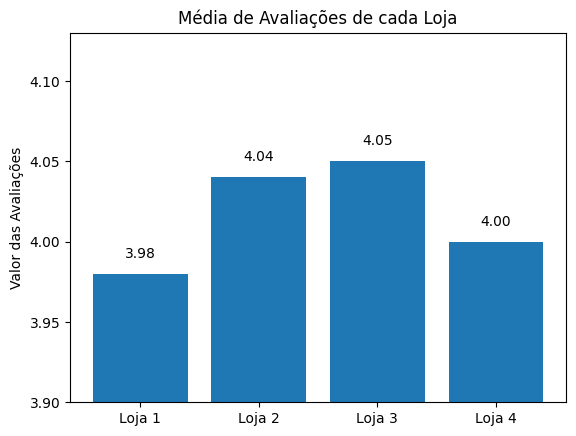

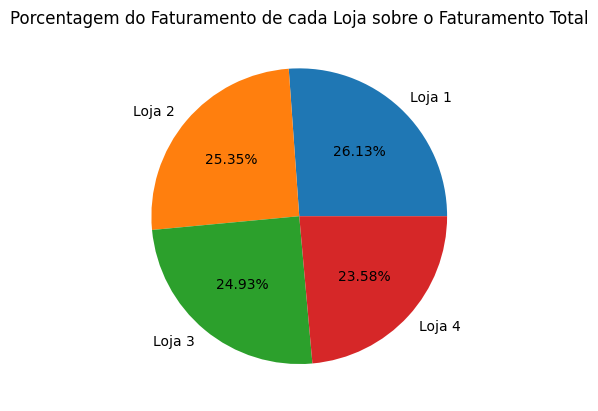

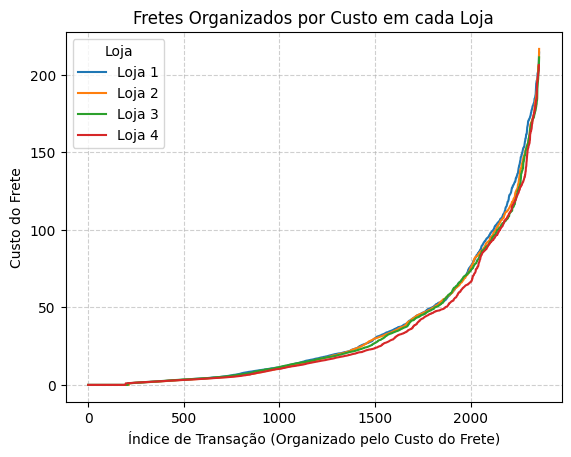

In [13]:
def visao_geral(conj_lojas):
  for nome_loja, loja in conj_lojas.items():
    print(f"\n\n===== {nome_loja} =====")
    print(f"Faturamento: {fat_total(loja)}")
    print(f"Categoria mais popular: {mais_popular(loja)}")
    print(f"Média avaliação: {media_avaliacao(loja)}")
    print(f"Produto mais vendido: {mais_vendido(loja)}")
    print(f"Produto menos vendido: {menos_vendido(loja)}")
    print(f"Custo médio do frete: {frete_custo_med(loja)}")

def graficos_gerais(conj_lojas):
  grafico_avaliação(conj_lojas)
  grafico_faturamento(conj_lojas)
  grafico_frete(conj_lojas)

visao_geral(lojas)
graficos_gerais(lojas)

# Introdução
A seguinte análise tem por objetivo considerar os pontos fortes e fracos de cada loja e decidir qual loja o Senhor João deve vender. Serão análisados os dados das funções do desafio, tais como, o faturamento total de cada loja, a média de avaliação, o custo do frete e os dados dos produtos, bem como os gráficos gerados.

# Desenvolvimento
A análise será na seguinte ordem: faturamento total, média de avaliação, custo de frete e os dados dos produtos

### Faturamento Total
O faturamento geral de cada loja varia entre 1,38 milhões a 1,53 milhões, são faturamentos consideravelmente próximos (diferença de 150 mil) e, devido a isso, não deve ser analisado somente o faturamento das lojas.
A loja com maior faturamento foi a Loja 1, com 1,53 milhões, e a loja com o menor faturamento foi a Loja 4, com 1,38 milhões. A Loja 2 e a Loja 3 têm faturamentos bem próximos entre si, com 1,48 milhões e 1,46 milhões, respectivamente.

### Média de Avaliação
Avaliação indica a satisfação dos clientes com o funcionamento da loja, uma avaliação ruim indica insatisfação dos clientes, o que deve ser levado em consideração antes de vender uma loja. Sendo assim, ordem decrescente das avaliações é: Loja 3, Loja 2, Loja 4 e Loja 1. A Loja 1 é a loja com a pior avaliação e a Loja 3 é a com melhor avaliação.

### Custo Médio de Frete
Custo médio de frete alto indica que os clientes moram longe e que levar o produto até a casa do cliente pode impactar no lucro da loja. A loja com menor frete é a Loja 4, com aproximadamente 31 reais de frete, e a com maior frete é a Loja 1, com aproximadamente 34,5 reais em frete.

### Dados sobre produtos
A categoria mais popular de todas as lojas é "móveis". De forma geral, o best seller tem 60 vendas e o menos vendido cerca de 30 vendas, isso em todas as lojas.

# Conclusão
A análise sobre cada loja individualmente:
- Loja 1: tem o maior faturamento, a pior avaliação e o custo de frete mais alto
- Loja 2: tem um faturamento bom, uma ótima avaliação e o custo médio de frete é ok se comparar com a Loja 1.
- Loja 3: tem um faturamento na média, tem a melhor avaliação e um custo médio de frete bom.
- Loja 4: tem o pior faturamento, tem uma avaliação na média, mas bem próxima das Loja 2 e Loja 3 e o tem o menor custo médio de frete.

Diante desses dados, visando a satisfação dos clientes (na avaliação) em detrimento do faturamento, a loja que deve ser vendida pelo Senhor João é a Loja 1. Os motivos que levaram a essa conclusão são a pior avaliação e o custo de frete mais alto.